In [1]:
import urllib
import urllib.request
import json
import matplotlib.pyplot as plt
import pprint
import pandas as pd
import seaborn as sns

In [2]:
appId = "1228171589a8c7453c27fced05d8d1e1fa944be8"
url = "http://api.e-stat.go.jp/rest/2.1/app/json/getStatsData?"
keys = {
    "appId":appId,
    "lang":"J",
    "statsDataId":"0003147022",
    "metaGetFlg":"Y",
    "cntGetFlg":"N",
    "sectionHeaderFlg":"1"
}
paramStr =urllib.parse.urlencode(keys)
rObj =urllib.request.urlopen(url+paramStr)
resStr = rObj.read()
res = json.loads(resStr)
pprint.pprint(res,depth =4)
table_info_values = res['GET_STATS_DATA']['STATISTICAL_DATA']['DATA_INF']['VALUE']
df = pd.io.json.json_normalize(table_info_values, sep ='_')

{'GET_STATS_DATA': {'PARAMETER': {'CNT_GET_FLG': 'N',
                                  'DATA_FORMAT': 'J',
                                  'LANG': 'J',
                                  'METAGET_FLG': 'Y',
                                  'SECTION_HEADER_FLG': 1,
                                  'START_POSITION': 1,
                                  'STATS_DATA_ID': '0003147022'},
                    'RESULT': {'DATE': '2021-09-09T10:58:09.037+09:00',
                               'ERROR_MSG': '正常に終了しました。',
                               'STATUS': 0},
                    'STATISTICAL_DATA': {'CLASS_INF': {'CLASS_OBJ': [...]},
                                         'DATA_INF': {'NOTE': [...],
                                                      'VALUE': [...]},
                                         'RESULT_INF': {'FROM_NUMBER': 1,
                                                        'TOTAL_NUMBER': 2700,
                                                        'TO_NUMBER':

/var/folders/hb/3db8mbcj4l74ztsvqyx17yd00000gn/T/ipykernel_54218/2542639079.py:17: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  df = pd.io.json.json_normalize(table_info_values, sep ='_')


In [3]:
df.columns = [s.replace('@', '').replace('$', 'val') for s in df.columns]
codes = res['GET_STATS_DATA']['STATISTICAL_DATA']['CLASS_INF']['CLASS_OBJ']

In [4]:
gender = codes[1]['CLASS']
gender_dict = {}
for i in gender:
    gender_dict.update({i['@code']:i['@name']})
gender_dict_eng = {'20':'Male','30':'Female'}
age =codes[3]['CLASS']
age_dict = {}
for i in age:
    age_dict.update({i['@code']:i['@name']})
df.time = df.time.str.extract(r'(^\w{4})')
df['gender_jpn']=df.cat01.map(gender_dict)
df['gender']=df.cat01.map(gender_dict_eng)
df['age']=df.cat03.map(age_dict)

In [5]:
df.time =pd.to_numeric(df.time)
df.val =pd.to_numeric(df.val)

In [6]:
df['cohort_17'] = df.time - 17

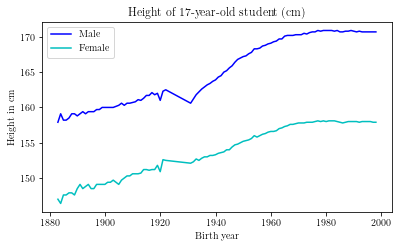

In [22]:
fig, ax = plt.subplots()

plt.rc('text', usetex=True)
plt.rc('font', family='serif')

#plt.rc('pgf', texsystem = 'xelatex')
df[(df.cat03=='130') & (df.gender == 'Male')].plot(x = 'cohort_17', y = 'val', 
#               label = r'Normalized cap wedge $\biggl(\frac{1 + \tau_{R,t}}{1 + \tau_{C,t}}-1 \biggr)$', 
               #linestyle = '--',
               color = 'b',
               label = 'Male',
               ax = ax)

df[(df.cat03=='130') & (df.gender == 'Female')].plot(x = 'cohort_17', y = 'val', 
#               label = r'Normalized cap wedge $\biggl(\frac{1 + \tau_{R,t}}{1 + \tau_{C,t}}-1 \biggr)$', 
               #linestyle = '--',
               color = 'c',
               label = 'Female',
               ax = ax)

#ax.set_rasterized(True)
#ax.legend_.remove()
#ax.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))
plt.xlabel('Birth year')
plt.ylabel('Height in cm')
fig.set_size_inches(w=6.26894, h=3.5)
plt.title('Height of 17-year-old student (cm)')
plt.savefig('../../Notes/Facts/height_17.pgf')
plt.show()